In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
!pwd

/Users/ashwinkumaark/Desktop


In [3]:
cd '/content/drive/MyDrive/CNN Model'

[Errno 2] No such file or directory: '/content/drive/MyDrive/CNN Model'
/Users/ashwinkumaark/Desktop


In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from matplotlib import pyplot

In [3]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

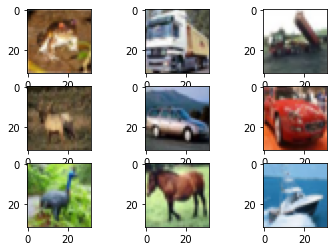

In [4]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i])
pyplot.show()

In [5]:
# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [7]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

2022-03-24 12:10:11.978869: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [10]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=32, epochs=2, validation_data=(X_test, Y_test))

Epoch 1/2
1563/1563 [==============================] - 504s 322ms/step - loss: 1.5189 - accuracy: 0.4428 - val_loss: 1.1115 - val_accuracy: 0.6128
Epoch 2/2
1563/1563 [==============================] - 674s 431ms/step - loss: 1.1030 - accuracy: 0.6083 - val_loss: 0.9116 - val_accuracy: 0.6835


In [22]:
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 59.870


In [23]:
model.save("cifar_cnn_model.h5")

In [24]:
!pip install opencv-python
import cv2

In [25]:
!pip install cv2_plt_imshow

     |████████████████████████████████| 60.5 MB 44 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [26]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from matplotlib import pyplot
from cv2_plt_imshow import cv2_plt_imshow
import cv2

In [27]:
cifar10_classes = {0 :"airplane", 
                   1: "automobile", 
                   2: "bird", 
                   3: "cat", 
                   4: "deer", 
                   5: "dog", 
                   6: "frog", 
                   7: "horse", 
                   8: "ship", 
                   9: "truck"}

model = load_model('cifar_cnn_model.h5')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 75)        33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 75)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 125)       84500     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 125)        0         
 2D)                                                    

In [47]:
img1 = load_img("/content/drive/MyDrive/CNN Model/test_car.jpeg", target_size=(32, 32))
img1 = img_to_array(img1)
img1 = img.reshape(1, 32, 32, 3)
img1 = img.astype('float32')
img1 = img / 255.0

In [48]:
img1

array([[[[1.9992310e-04, 1.2302962e-04, 3.0757405e-05],
         [2.4605924e-04, 4.6136101e-05, 0.0000000e+00],
         [7.5355632e-04, 4.9211847e-04, 2.4605924e-04],
         ...,
         [2.1837757e-03, 2.5528644e-03, 2.9527105e-03],
         [2.2145330e-03, 2.5374857e-03, 2.9527105e-03],
         [2.2145330e-03, 2.5374857e-03, 2.9527105e-03]],

        [[7.2279893e-04, 4.3060363e-04, 1.6916571e-04],
         [1.3379470e-03, 1.0149943e-03, 7.5355632e-04],
         [7.6893502e-04, 4.7673972e-04, 2.4605924e-04],
         ...,
         [2.2760478e-03, 2.5990005e-03, 2.9219531e-03],
         [2.2760478e-03, 2.5990005e-03, 2.9219531e-03],
         [2.2760478e-03, 2.5990005e-03, 2.9219531e-03]],

        [[1.0765091e-04, 1.2302962e-04, 4.6136101e-05],
         [6.1514809e-05, 7.6893506e-05, 0.0000000e+00],
         [1.3840832e-04, 6.1514809e-05, 1.5378702e-05],
         ...,
         [2.3990774e-03, 2.6451366e-03, 2.8450596e-03],
         [2.4144561e-03, 2.6605153e-03, 2.9065744e-03],
  

In [93]:
result = model.predict(img1)
result
result_classes = np.argmax(result, axis=1)
#random_index = np.random.randint(0, len(result))
pred_label = cifar10_classes[result_classes[0]]

frog


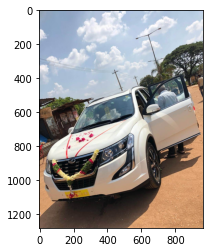

In [94]:
import numpy as np
from numpy import array
image = cv2.imread("/content/drive/MyDrive/CNN Model/test_car.jpeg")
cv2_plt_imshow(image)
print(pred_label)

In [74]:
img2 = load_img("/content/drive/MyDrive/CNN Model/test.jpeg", target_size=(32, 32))
img2 = img_to_array(img2)
img2 = img.reshape(1, 32, 32, 3)
img2 = img.astype('float32')
img2 = img / 255.0


In [95]:
result = model.predict(img2)
result
result_classes = np.argmax(result, axis=1)
random_index = np.random.randint(0, len(result))
(result[random_index, :])
pred_label1 = cifar10_classes[result_classes[random_index]]

frog


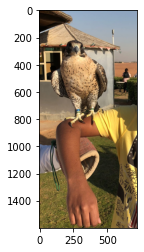

In [96]:
result = model.predict(img2)
image = cv2.imread("/content/drive/MyDrive/CNN Model/test.jpeg")
cv2_plt_imshow(image)
print(pred_label1)